# Tutorial: Preprocessing waveform audio into log-mel spectrogram

This tutorial notebook uses torchaudio only.

## Downloading FSDKaggle2018

    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_test.zip
    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.audio_train.zip
    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.doc.zip
    wget https://zenodo.org/record/2552860/files/FSDKaggle2018.meta.zip


In [1]:
# Comment out if your don't have my library dl-cliche, or you can install by `pip install dl-cliche`. It's good for you :)
# This will make your notebook work easier (enables auto-reload, and etc ...)
from dlcliche.notebook import *
import warnings
warnings.simplefilter('ignore')

In [7]:
# Essential PyTorch
import torch
import torchaudio

# Other modules used in this notebook
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import yaml
from easydict import EasyDict

## Example: Parameter handling with yaml

In [33]:
### CONFIGURE YOURS ###
FSD2018_ROOT = Path('/data/A/2018fsd')
WORK = Path('work')

# Load configuration parameters
with open('config.yaml') as conf:
    cfg = EasyDict(yaml.safe_load(conf))

print(cfg)
print()
print('You can overwrite parameters here, example:')
print('cfg.n_mels = 128')

{'clip_length': 1.0, 'sample_rate': 44100, 'hop_length': 441, 'n_fft': 1024, 'n_mels': 64, 'f_min': 0, 'f_max': 22050}

You can overwrite parameters here, example:
cfg.n_mels = 128


## Example: Load & convert to spectrogram

Training set has 9473 files. First file: /data/A/2018fsd/FSDKaggle2018.audio_train/00044347.wav


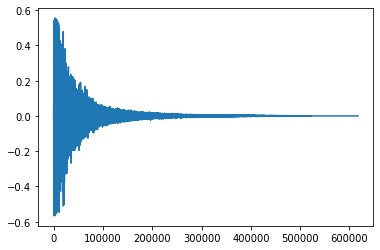

Listen to the first 1 second.


In [4]:
# Load example wave.
train_files = sorted(FSD2018_ROOT.glob('FSDKaggle2018.audio_train/*.wav'))

print(f'Training set has {len(train_files)} files. First file:', train_files[0])
waveform, sr = torchaudio.load(train_files[0])
plt.plot(waveform.t().numpy()); plt.show()
print('Listen to the first 1 second.')
Audio(waveform[0, :sr], rate=sr)

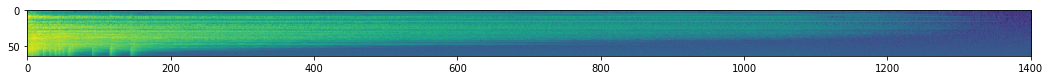

In [5]:
# Instantiate mel spectrogram converter 
to_mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=cfg.sample_rate, n_fft=cfg.n_fft, n_mels=cfg.n_mels,
    hop_length=cfg.hop_length, f_min=cfg.f_min, f_max=cfg.f_max)

# Waveform to log-mel spectrogram
log_mel_spec = to_mel_spectrogram(waveform).log()

plt.figure(figsize=(18,5))
plt.imshow(log_mel_spec[0])

## Preprocess audio files: convert to log-mel spectrogram

In [14]:
folders = ['FSDKaggle2018.audio_test', 'FSDKaggle2018.audio_train']

for folder in folders:
    cur_folder = FSD2018_ROOT/folder
    filenames = sorted(cur_folder.glob('*.wav'))
    for filename in filenames:
        # Load waveform
        waveform, sr = torchaudio.load(filename)
        assert sr == cfg.sample_rate
        # To log-mel spectrogram
        log_mel_spec = to_mel_spectrogram(waveform).log()
        # Write to work
        (WORK/folder).mkdir(parents=True, exist_ok=True)
        np.save(WORK/folder/filename.name.replace('.wav', '.npy'), log_mel_spec)

In [18]:
# Shows number of files converted
!ls -1R {WORK} | grep .npy | wc -l

11073
